IMPORTS

In [ ]:
# Install dependencies: 
!pip install -r requirements.txt > /dev/null

In [1]:
from datetime import datetime
import glob
import os
import re

import act
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

DEFINE LOCATION, DATE RANGE, AND VARIABLES

In [ ]:
DATA_DIR = os.environ.get("DATA_DIR")
SITE = "sgp"
FACILITY = "C1"
BEGIN_DATE = "20231001"  # Use ARM date format: YYYYMMDD
END_DATE = "20231130"    # End date is inclusive!
VARIABLES = ['rain_rate', 'reflectivity_factor_sband20c', 'reflectivity_factor_cband20c']

print(f"Retrieving ldquants data from {SITE} {FACILITY} between {BEGIN_DATE} and {END_DATE}")

Retrieving ldquants data from sgp C1 between 20231001 and 20231130


LOAD DATA

In [6]:
ARM_FILENAME_PATTERN = re.compile(
    r"^([a-z]{3})(.+)([A-Z]\d+)\.([a-z0]\d)\.(\d{8}\.\d{6})\.(.+)$"
)

# Compile list of files
date_start = datetime.strptime(BEGIN_DATE, '%Y%m%d')
date_end = datetime.strptime(END_DATE, '%Y%m%d')
dir_path = os.path.join(DATA_DIR, SITE, f"{SITE}ldquants{FACILITY}.c1" )

all_files = os.listdir(dir_path)
files_for_dates = []
for filename in all_files:
    match = ARM_FILENAME_PATTERN.match(filename)
    if match:
        file_time = match.groups()[4]
        file_date = datetime.strptime(file_time, "%Y%m%d.%H%M%S")
        if file_date >= date_start and file_date < date_end:
            files_for_dates.append(filename)
        
# Read the file data into an xarray Dataset
files_for_dates = [os.path.join(dir_path, f) for f in files_for_dates]
ds = act.io.armfiles.read_netcdf(files_for_dates)
ds.clean.cleanup()

/tmp/ipykernel_1687334/3626851321.py:22: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds = act.io.armfiles.read_netcdf(files_for_dates)


PLOT DATA

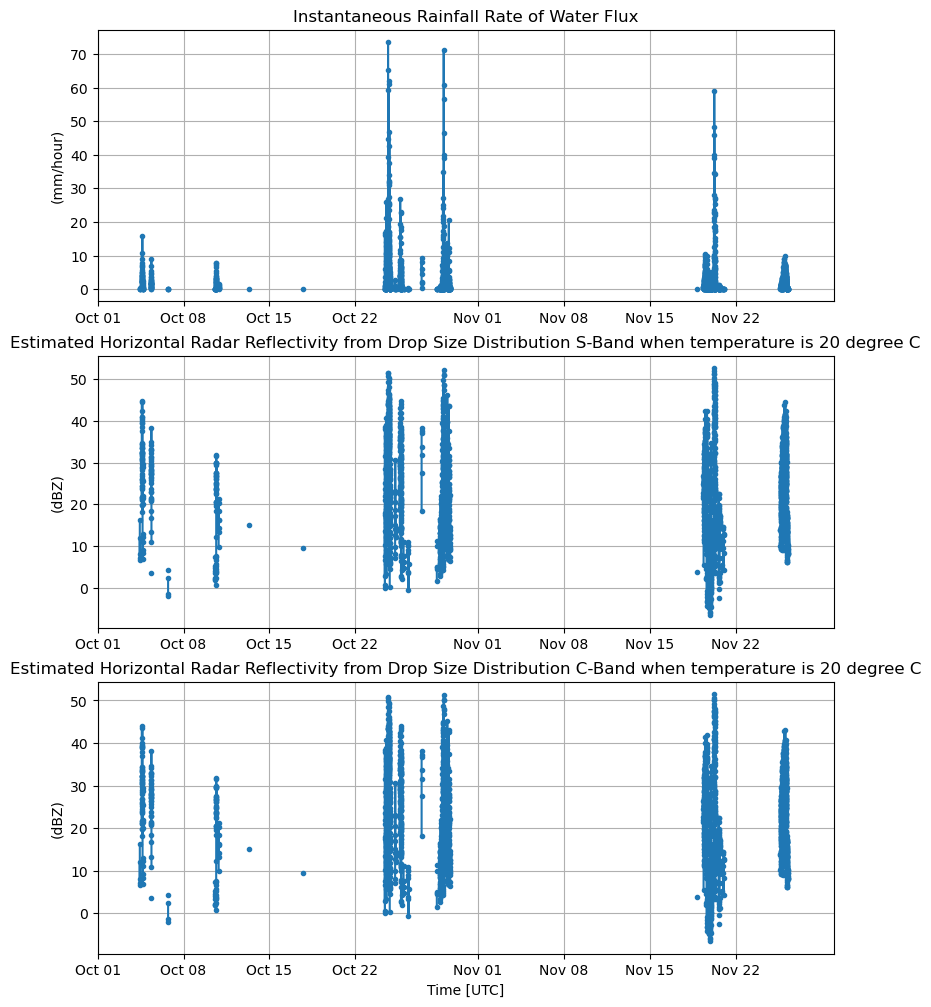

In [7]:
ts_display = act.plotting.TimeSeriesDisplay(ds)
ts_display.add_subplots((len(VARIABLES),), figsize = (9.5,4*len(VARIABLES)))

for i,v in enumerate(VARIABLES):
    ts_ax = ts_display.plot(v, subplot_index=(i,), set_title=ds.variables[v].attrs['long_name'],)
    ts_ax.grid()

plt.show()